<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

---
---
## Importamos librerias, datos y configuraciones

In [62]:
%load_ext autoreload
%autoreload 2

from config import *


df = pd.read_csv(f"{DATOS_RUTA_BASE}/datos.csv", index_col=0).reset_index(drop=True)
df.sample()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,reviewId,reviewDate,mainDepartment,subDepartment,productName,reviewTitle,reviewStar,reviewText,inconsistentStatus
1014,R14YMQKUW9CFQ,"Reviewed in the United States on June 11, 2021",Sports and Outdoors,Outdoor Recreation,Master Lock 8143D Bike Lock Cable with Combina...,Better than no lock at all,1.00,I have been using this to lock up my bike but ...,1


---
---
# Caso 1

#### vemos si tenemos duplicados o nulos.

In [63]:
df.duplicated().sum()

0

In [64]:
df.isna().sum()

reviewId              0
reviewDate            0
mainDepartment        0
subDepartment         0
productName           0
reviewTitle           5
reviewStar            0
reviewText            1
inconsistentStatus    0
dtype: int64

In [65]:
df.sample()

,reviewId,reviewDate,mainDepartment,subDepartment,productName,reviewTitle,reviewStar,reviewText,inconsistentStatus
5580,RAD4IH0H1287X,"Reviewed in the United States on August 2, 2021",Sports and Outdoors,Outdoor Recreation,"Vont 2 Pack LED Camping Lantern, Super Bright ...",Works really well for how cheap that they are,5.00,These lanterns were super bright and lit up ou...,0


## juntamos el texto de las reviews, lo limpiamos, vectorizamos, calculamos su similitud con los demás textos y recomendamos los 5 primeros productos

Recomendaciones para el producto 'Gildan Men's Crew T-Shirts, Multipack':
Product Names -->  5
Product Similarity -->  5
ZIP -->  <zip object at 0x00000213AEA3AC40>


{"adidas Men's Adilette Shower Slide": 0.5267,
 "Fruit of the Loom Men's Coolzone Boxer Briefs": 0.5056,
 'Amazon Basics Extra Thick Exercise Yoga Gym Floor Mat with Carrying Strap - 74 x 24 x .5 Inches, Black': 0.4575,
 "Carhartt Men's Knit Cuffed Beanie, Black/White, One Size": 0.3415,
 'Utopia Towels Grey Towel Set, 2 Bath Towels, 2 Hand Towels, and 4 Washcloths, 600 GSM Ring Spun Cotton Highly Absorbent Towels for Bathroom, Shower Towel, (Pack of 8)': 0.3329}

<Axes: >

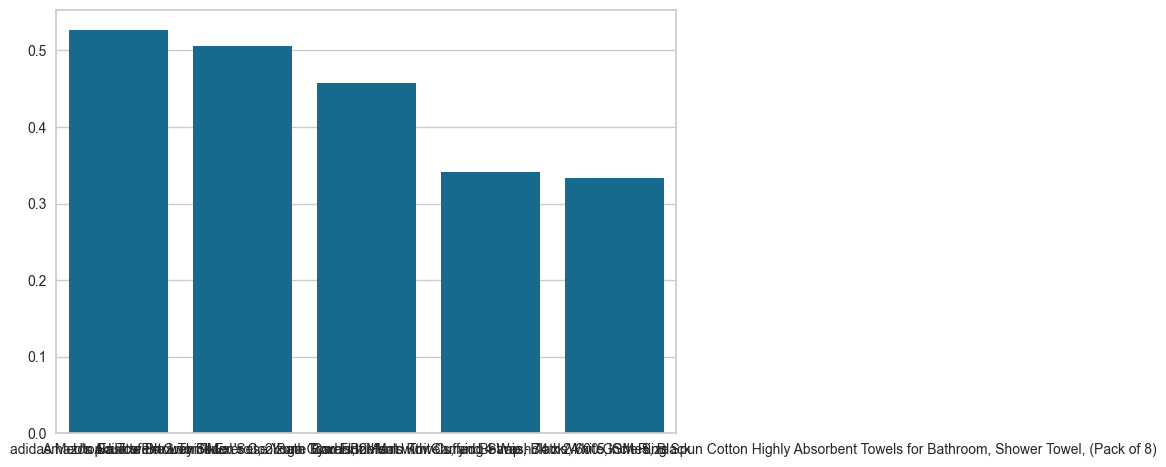

In [66]:
# 2. Preparar los datos combinando columnas clave
df['combined_features'] = (
    df['reviewTitle'].fillna('') + ' ' +
    df['reviewText'].fillna('') + ' '
    )

sup_nlp.generar_columna_limpia(dataframe=df, columna='combined_features', nueva_columna='cleaned_combined_features')


vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_combined_features'])


cosine_sim = cosine_similarity(tfidf_matrix)


def recomendar_producto(nombre_producto, cosine_sim_=cosine_sim):
    idx = df[df['productName'] == nombre_producto].index[0]  # Obtener índice del producto
    sim_scores = list(enumerate(cosine_sim_[idx]))  # Obtener las similitudes
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Ordenar por similitud
    sim_scores = sim_scores[1:6]  # Excluir el producto actual y tomar los top 5
    product_names = [df['productName'].iloc[i[0]] for i in sim_scores]
    print("Product Names --> ",len(product_names))

    product_similarity = [round(i[1], 4) for i in sim_scores]
    print("Product Similarity --> ", len(product_similarity))
    
    comprimido = zip(product_names, product_similarity)
    print("ZIP --> ", comprimido)

    resultado = {tuple_[0]:tuple_[1] for tuple_ in comprimido}
    
    return resultado

# 6. Probar la recomendación
producto_ejemplo = "Gildan Men's Crew T-Shirts, Multipack"
print(f"Recomendaciones para el producto '{producto_ejemplo}':")

recomended_products = recomendar_producto(producto_ejemplo, cosine_sim)

display(recomended_products)

sns.barplot(x=recomended_products.keys(), y=recomended_products.values())